In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#librerie varie

iris = load_iris()
X = iris.data[:, :2]
y_bool = iris.target!=2
y = iris.target[y_bool]
X = X[y_bool]

(1.0, 5.0)

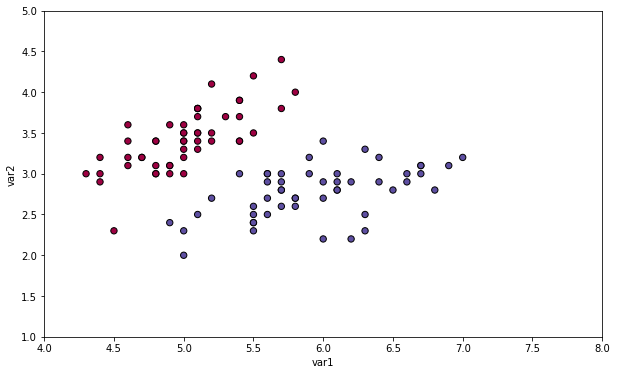

In [2]:
plt.figure(figsize=(10, 6)) #stampo una prima volta il grafico per capire in che situazione mi trovo

ax = plt.gca() #per centrare il grafico a dove sono i punti
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
plt.plot(-0.8, 0.8, 'bx', markersize=20, markeredgewidth=2)

plt.xlabel("var1")
plt.ylabel("var2")
ax.set_xlim([4, 8]) #valori decisi dopo aver visto come veniva stampato il grafico
ax.set_ylim([1, 5]) 

In [3]:
def prendi_punto(X): #serve per passare i punti alla gradient descent, per partire da un valore base
    punti = np.ones((X.shape[0], 1))
    return np.concatenate((punti, X), axis=1)

def sigmoid(z): #funzione base della logistic 
    return 1 / (1 + np.exp(-z))

def calcola_costo(X, theta):
    temp = np.dot(X, theta)
    valore = sigmoid(temp)
    return valore

sol = prendi_punto(X)
theta = np.zeros(sol.shape[1])
h = calcola_costo(sol, theta)

In [4]:
costo = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(costo) #vedo il costo iniziale e vedo se ha senso la formula di costo

0.6931471805599453


In [5]:
m = y.size #numero dei samples per iniziare
alpha = 0.01 #learning_rate=alpha=0.01 -> lo stesso della linear regression

gradiente = np.dot(sol.T, (h - y)) / m #essendo il gradiente iniziale non serve fare il gradient descent ma basta seguire la formula
theta -= alpha * gradiente             #lo faccio fuori dal ciclo per dare un valore ad alpha e gradiente, non a mia scelta, devono essere diversi da zero

print(gradiente) #gradiente iniziale
print(theta) #theta iniziale

[ 0.     -0.2325  0.1645]
[ 0.        0.002325 -0.001645]


In [6]:
iterazioni = 100000 #ho messo molte iterazioni, è possibile mettere un numero anche più piccolo
array_costo = [] #array che tiene tutti i costi

for i in range(iterazioni): #questa è la gradient descent
    h = calcola_costo(sol, theta)
    costo = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    array_costo.append(costo)
    
    gradiente = np.dot(sol.T, (h - y)) / m
    theta -= alpha * gradiente


    if i % 10000 == 0:
        print('Costo: {}'.format(costo))

print('Coefficienti finali: {}'.format(theta)) #qui i coefficienti sono 3 poichè si usa una loss che ritorna 1 o 0. Quindi abbiamo 2 valori in meno della Linear

#Anche qua la Loss converge e questo è un buon segno
#Anche qua l'algoritmo riesce a trovare i coefficenti, qui trovandoci in meno dimensioni possiamo stampare il grafico

Costo: 0.692343689904554
Costo: 0.09999033826190931
Costo: 0.07368632184101913
Costo: 0.06357126860308172
Costo: 0.058009499686758115
Costo: 0.054392002167281156
Costo: 0.051789704570976154
Costo: 0.04978586481540392
Costo: 0.048165010115294546
Costo: 0.046804363217027356
Coefficienti finali: [-3.34369651  6.0159614  -9.44361964]


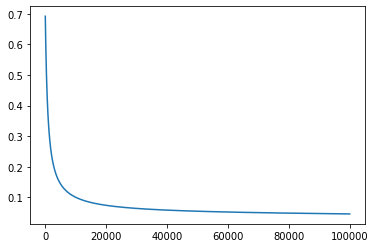

In [7]:
plt.plot(range(iterazioni), array_costo)

In [8]:
nuovo_punto = np.array([1, -1, 3])   #con la regression possiamo implementare questa facile funzione nella quale mettendo i coefficienti
                                     #possiamo aggiungere virtualmente un punto e dire a cosa appartiene
probabilita_punto = calcola_costo(nuovo_punto, theta).round()
print("predicted output for the new observation: ", probabilita_punto)

predicted output for the new observation:  0.0


(2.0, 4.4)

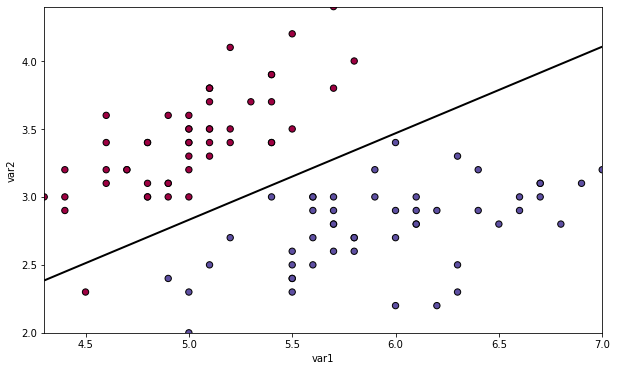

In [9]:
plt.figure(figsize=(10, 6))

x1_min, x1_max = X[:,0].min(), X[:,0].max(), #per centrare meglio grafico
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
v1, v2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) #calcola prodotto cartesiano di due vettori
grid = np.c_[v1.ravel(), v2.ravel()]

#finisco l'ultimo giro di gradient descent e calcolo probabilità con calcola_costo/sigmoid
grid = prendi_punto(grid)  #praticamente rifaccio quello che ho fatto nella cella sopra ma per tutti i punti
probs = calcola_costo(grid, theta)
probs = probs.reshape(v1.shape)

ax = plt.gca() #per centrare il grafico a dove sono i punti
plt.contour(v1, v2, probs, [0.5], linewidths=2, colors='black') #  boundary la mettiamo a 0.5, se "p>0.5"->"1", se "p<0.5"->"0"
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')

plt.xlabel("var1")
plt.ylabel("var2")
ax.set_xlim([x1_min, x1_max])
ax.set_ylim([x2_min, x2_max])

#Fa una classificazione accurata. Valutando loss convergente, coefficienti trovati e grafico sensato, ritengo che l'algoritmo funziona.